# Notebook for Initial Basic LR Model

In [1]:
# Standard Packages
import pandas as pd
import numpy as np

# Viz Packages
import seaborn as sns
import matplotlib.pyplot as plt

# Scipy Stats
import scipy.stats as stats 

# Statsmodel Api
import statsmodels.api as sm
from statsmodels.formula.api import ols

# SKLearn Modules
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
import sklearn.metrics as metrics

# Notebook Options
import warnings
warnings.filterwarnings("ignore", category= FutureWarning)
warnings.filterwarnings("ignore", category=DeprecationWarning) 

pd.options.display.max_columns = None
pd.options.display.width = None

In [2]:
# Import Baseline DF for Modeling
df = pd.read_csv('../data/baseline_df.csv')
df

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,greenbelt,nuisance,view,condition,grade,heat_source,sewer_system,sqft_above,sqft_basement,sqft_garage,sqft_patio,yr_built,lat,long,renovated,month,year,zip
0,7399300360,675000.0,4,1.0,1180,7140,1.0,0,0,0,0,4,7,Gas,PUBLIC,1180,0,0,40,1969,47.461975,-122.19052,0,5,2022,98055
1,8910500230,920000.0,5,2.5,2770,6703,1.0,0,0,1,2,3,7,Oil,PUBLIC,1570,1570,0,240,1950,47.711525,-122.35591,0,12,2021,98133
2,1180000275,311000.0,6,2.0,2880,6156,1.0,0,0,0,2,3,7,Gas,PUBLIC,1580,1580,0,0,1956,47.502045,-122.22520,0,9,2021,98178
3,1604601802,775000.0,3,3.0,2160,1400,2.0,0,0,0,2,3,9,Gas,PUBLIC,1090,1070,200,270,2010,47.566110,-122.29020,0,12,2021,98118
4,8562780790,592500.0,2,2.0,1120,758,2.0,0,0,1,0,3,7,Electricity,PUBLIC,1120,550,550,30,2012,47.532470,-122.07188,0,8,2021,98027
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29186,7834800180,1555000.0,5,2.0,1910,4000,1.5,0,0,0,0,4,8,Oil,PUBLIC,1600,1130,0,210,1921,47.664740,-122.32940,0,11,2021,98103
29187,194000695,1313000.0,3,2.0,2020,5800,2.0,0,0,0,1,3,7,Gas,PUBLIC,2020,0,0,520,2011,47.565610,-122.38851,0,6,2021,98116
29188,7960100080,800000.0,3,2.0,1620,3600,1.0,0,0,1,0,3,7,Gas,PUBLIC,940,920,240,110,1995,47.610395,-122.29585,0,5,2022,98122
29189,2781280080,775000.0,3,2.5,2570,2889,2.0,0,0,0,0,3,8,Gas,PUBLIC,1830,740,480,100,2006,47.449490,-122.18908,0,2,2022,98055


In [3]:
print(len(df.loc[df['price'] < 500000]))                     
print(len(df.loc[df['price'] < 250000]))
print(len(df.loc[df['price'] > 15000000]))

2819
400
7


In [6]:
# Drop id and adress columns
baseline_df = df.drop(columns=['id', 'address'])
baseline_df

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,greenbelt,nuisance,view,condition,grade,heat_source,sewer_system,sqft_above,sqft_basement,sqft_garage,sqft_patio,yr_built,lat,long,renovated,zip,month,year
0,675000.0,4,1.0,1180,7140,1.0,0,0,0,0,4,7,Gas,PUBLIC,1180,0,0,40,1969,47.461975,-122.19052,0,98055,5,2022
1,920000.0,5,2.5,2770,6703,1.0,0,0,1,2,3,7,Oil,PUBLIC,1570,1570,0,240,1950,47.711525,-122.35591,0,98133,12,2021
2,311000.0,6,2.0,2880,6156,1.0,0,0,0,2,3,7,Gas,PUBLIC,1580,1580,0,0,1956,47.502045,-122.22520,0,98178,9,2021
3,775000.0,3,3.0,2160,1400,2.0,0,0,0,2,3,9,Gas,PUBLIC,1090,1070,200,270,2010,47.566110,-122.29020,0,98118,12,2021
4,592500.0,2,2.0,1120,758,2.0,0,0,1,0,3,7,Electricity,PUBLIC,1120,550,550,30,2012,47.532470,-122.07188,0,98027,8,2021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29186,1555000.0,5,2.0,1910,4000,1.5,0,0,0,0,4,8,Oil,PUBLIC,1600,1130,0,210,1921,47.664740,-122.32940,0,98103,11,2021
29187,1313000.0,3,2.0,2020,5800,2.0,0,0,0,1,3,7,Gas,PUBLIC,2020,0,0,520,2011,47.565610,-122.38851,0,98116,6,2021
29188,800000.0,3,2.0,1620,3600,1.0,0,0,1,0,3,7,Gas,PUBLIC,940,920,240,110,1995,47.610395,-122.29585,0,98122,5,2022
29189,775000.0,3,2.5,2570,2889,2.0,0,0,0,0,3,8,Gas,PUBLIC,1830,740,480,100,2006,47.449490,-122.18908,0,98055,2,2022


In [7]:
# Droprow where 3ft living space is clearly a data entry error
baseline_df = baseline_df.drop(index=(baseline_df[baseline_df['sqft_living'] == 3].index.values))

In [8]:
baseline_df.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'greenbelt', 'nuisance', 'view', 'condition', 'grade',
       'heat_source', 'sewer_system', 'sqft_above', 'sqft_basement',
       'sqft_garage', 'sqft_patio', 'yr_built', 'lat', 'long', 'renovated',
       'zip', 'month', 'year'],
      dtype='object')

In [9]:
baseline_500k_to_15mil = baseline_df.loc[(baseline_df['price'] > 500000) & (baseline_df['price'] < 15000000)]
baseline_500k_to_15mil

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,greenbelt,nuisance,view,condition,grade,heat_source,sewer_system,sqft_above,sqft_basement,sqft_garage,sqft_patio,yr_built,lat,long,renovated,zip,month,year
0,675000.0,4,1.0,1180,7140,1.0,0,0,0,0,4,7,Gas,PUBLIC,1180,0,0,40,1969,47.461975,-122.190520,0,98055,5,2022
1,920000.0,5,2.5,2770,6703,1.0,0,0,1,2,3,7,Oil,PUBLIC,1570,1570,0,240,1950,47.711525,-122.355910,0,98133,12,2021
3,775000.0,3,3.0,2160,1400,2.0,0,0,0,2,3,9,Gas,PUBLIC,1090,1070,200,270,2010,47.566110,-122.290200,0,98118,12,2021
4,592500.0,2,2.0,1120,758,2.0,0,0,1,0,3,7,Electricity,PUBLIC,1120,550,550,30,2012,47.532470,-122.071880,0,98027,8,2021
5,625000.0,2,1.0,1190,5688,1.0,0,0,1,0,3,7,Electricity,PUBLIC,1190,0,300,0,1948,47.763470,-122.340155,0,98133,7,2021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29185,719000.0,3,2.5,1270,1141,2.0,0,0,0,0,3,8,Gas,PUBLIC,1050,420,200,60,2007,47.690440,-122.370620,0,98117,10,2021
29186,1555000.0,5,2.0,1910,4000,1.5,0,0,0,0,4,8,Oil,PUBLIC,1600,1130,0,210,1921,47.664740,-122.329400,0,98103,11,2021
29187,1313000.0,3,2.0,2020,5800,2.0,0,0,0,1,3,7,Gas,PUBLIC,2020,0,0,520,2011,47.565610,-122.388510,0,98116,6,2021
29188,800000.0,3,2.0,1620,3600,1.0,0,0,1,0,3,7,Gas,PUBLIC,940,920,240,110,1995,47.610395,-122.295850,0,98122,5,2022


<AxesSubplot: ylabel='Frequency'>

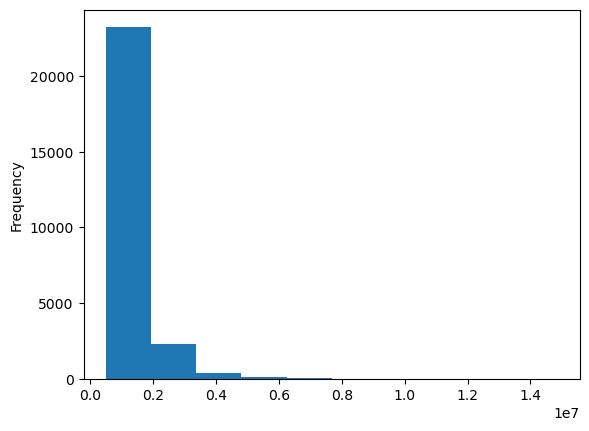

In [10]:
baseline_500k_to_15mil['price'].plot(kind='hist')

<AxesSubplot: >

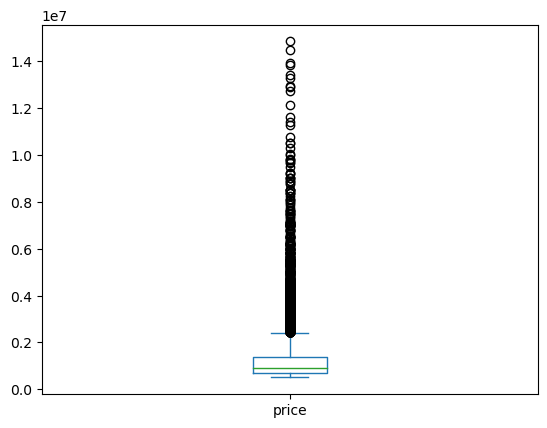

In [11]:
baseline_500k_to_15mil['price'].plot(kind='box')

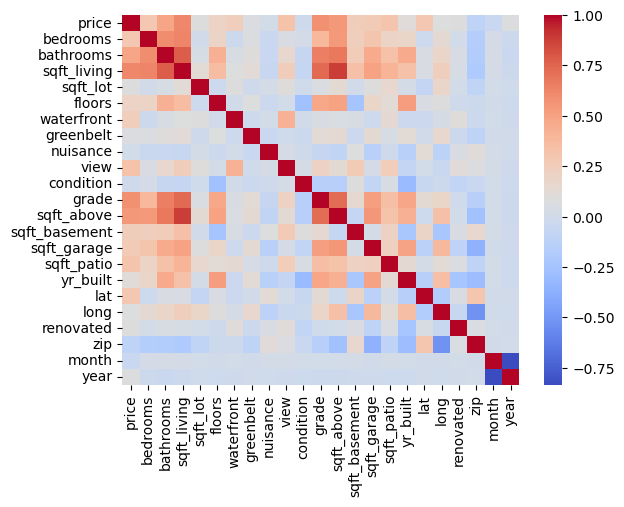

In [12]:
# Look at heatmap here
#Visualising the data using heatmap
plt.figure()
sns.heatmap(baseline_df.corr(),cmap='coolwarm')
plt.show()

## Heat Map Findings
### sqft_living and grade appear most highly correlated

In [13]:
# Dont think we'll need this
# # Drop id & address columns prior to running baseline model
# baseline_df_trimmed = baseline_df.drop(columns = ['id', 'address', 'heat_source', 'sewer_system'])
# baseline_df_trimmed

# Linear Regression Modeling

## Linear Regression Model #1
### Look just at the relationship between square footage of living space and price

- X = baseline_df_trimmed['sqft_living']
- y = baseline_df_trimmed['price']

In [14]:
lr_df = baseline_500k_to_15mil

In [15]:
# Convert living area series to np array and reshape
living_area = np.array(lr_df['sqft_living']).reshape(-1,1)

## Declare features and target variable
X = living_area
y = lr_df['price']

# Split the data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

# Create LR Model
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

In [16]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(17501, 1)
(8620, 1)
(17501,)
(8620,)


In [17]:
# feature_names = lr[:-1].get_feature_names_out()

# coefs = pd.DataFrame(
#     lr[-1].regressor_.coef_,
#     columns=["Coefficients"],
#     index=feature_names,)

# coefs


In [18]:
# Evaluate model 1 results
#Calculate intercept and coefficient
print(lr.intercept_)
print(lr.coef_)
# predictions = pred.reshape(-1,1)
#Calculate root mean squared error to evaluate model performance
print('MSE : ', metrics.mean_squared_error(y_test, y_pred))
print('RMSE : ', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

-44247.171828171005
[556.51374367]
MSE :  444422327477.39685
RMSE :  666650.0787350114


In [19]:
# Calculate Regression Results
def regression_results(y_test, y_pred):
    
    # Compute regression metrics
    explained_variance=metrics.explained_variance_score(y_test, y_pred)
    mean_absolute_error=metrics.mean_absolute_error(y_test, y_pred) 
    mse=metrics.mean_squared_error(y_test, y_pred) 
    mean_squared_log_error=metrics.mean_squared_log_error(y_test, y_pred)
    median_absolute_error=metrics.median_absolute_error(y_test, y_pred)
    r2=metrics.r2_score(y_test, y_pred)
    
    # Display formatted metrics
    print('explained_variance: ', round(explained_variance,4))    
    print('mean_squared_log_error: ', round(mean_squared_log_error,4))
    print('r2: ', round(r2,4))
    print('MAE: ', round(mean_absolute_error,4))
    print('MSE: ', round(mse,4))
    print('RMSE: ', round(np.sqrt(mse),4))

In [20]:
regression_results(y_test,y_pred)

explained_variance:  0.3585
mean_squared_log_error:  0.1891
r2:  0.3584
MAE:  409436.2285
MSE:  444422327477.3968
RMSE:  666650.0787


## Without transformations, the model only using sqft_living as a feature has an r2 value of .43

# Check for outliers in numeric features


<AxesSubplot: >

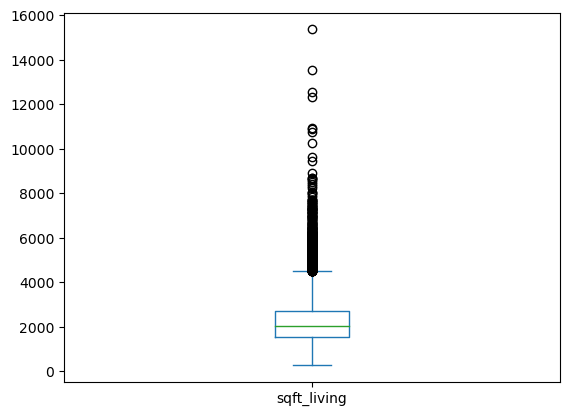

In [21]:
# Check sqft_living for outliers
lr_df['sqft_living'].plot(kind='box')

<AxesSubplot: ylabel='Density'>

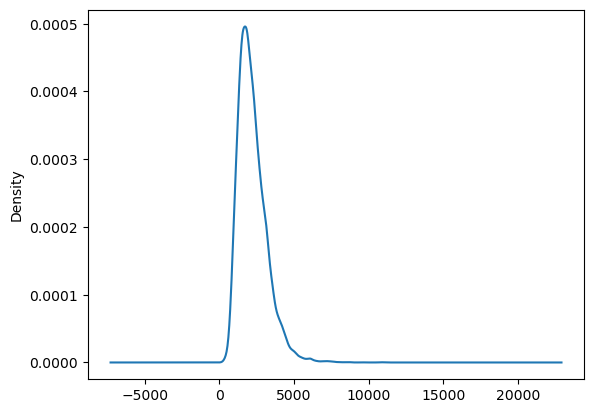

In [22]:
lr_df['sqft_living'].plot.density()

In [23]:
lr_df['sqft_living'].value_counts().sort_index(ascending=True)

260      1
290      3
310      1
320      1
350      1
        ..
10910    1
12300    1
12540    1
13540    1
15360    1
Name: sqft_living, Length: 1230, dtype: int64

In [24]:
lr_df['grade'].value_counts().sort_index(ascending=True)

3         4
4        19
5       187
6      1821
7     10063
8      8592
9      3559
10     1336
11      400
12      119
13       21
Name: grade, dtype: int64

In [25]:
lr_df['condition'].value_counts()

3    15924
4     7057
5     2949
2      157
1       34
Name: condition, dtype: int64

<AxesSubplot: >

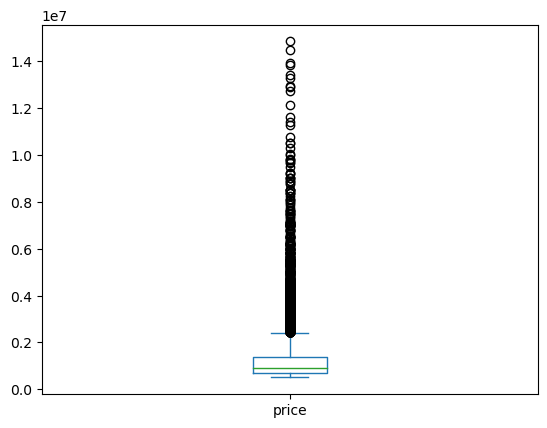

In [26]:
lr_df['price'].plot(kind='box')

In [27]:
lr_df['price'].value_counts().sort_index(ascending=True)

500003.0      1
500500.0      3
501000.0      7
501375.0      1
502000.0      8
             ..
13425000.0    1
13850000.0    1
13950000.0    1
14500000.0    1
14850000.0    1
Name: price, Length: 4248, dtype: int64

<AxesSubplot: ylabel='Density'>

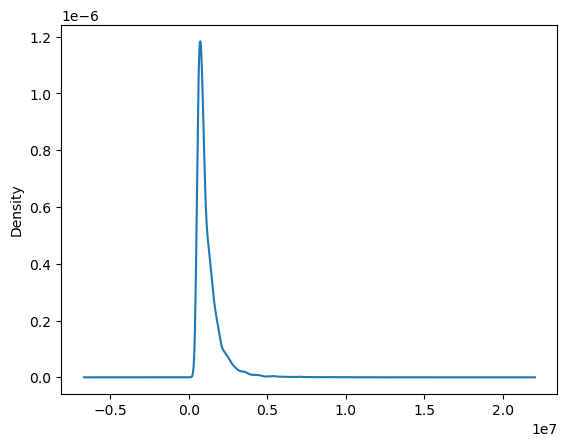

In [28]:
lr_df['price'].plot.density()

<AxesSubplot: ylabel='Frequency'>

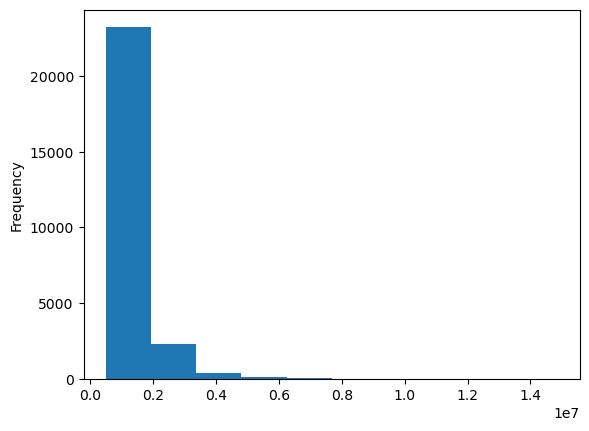

In [29]:
lr_df['price'].plot(kind='hist')

In [30]:
np.log1p(y_train)

1043     14.808763
16773    14.346139
12396    13.458837
17898    13.610945
6757     13.812507
           ...    
24128    14.220976
6074     13.610945
969      13.710151
17697    13.514407
26449    13.741865
Name: price, Length: 17501, dtype: float64

In [31]:
X_train.shape

(17501, 1)

In [39]:
# Declare features and target variable
y_train_log = np.log(y_train)
y_test_log = np.log(y_test)

# Instatiate LR model
log_model = LinearRegression()
log_model.fit(X_train, y_train_log)

log_model_preds = log_model.predict(X_test)
resids = y_test_log - model_preds


In [42]:
# Calculate Regression Results
regression_results(y_test_log,log_model_preds)

explained_variance:  0.3935
mean_squared_log_error:  0.0006
r2:  0.3934
MAE:  0.301
MSE:  0.1466
RMSE:  0.3829


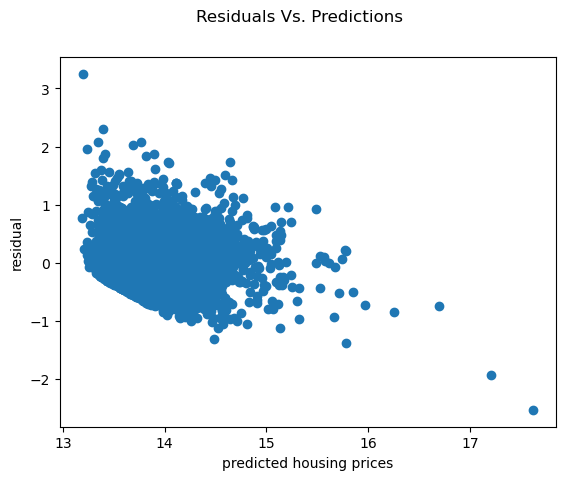

In [43]:
fig, ax = plt.subplots()
ax.scatter(model_preds, resids)
ax.set_xlabel('predicted housing prices')
ax.set_ylabel('residual')
plt.suptitle('Residuals Vs. Predictions');

((array([-3.77374282, -3.54652028, -3.42167638, ...,  3.42167638,
          3.54652028,  3.77374282]),
  array([-2.53172861, -1.92317568, -1.38866824, ...,  2.07988305,
          2.29553475,  3.24939896])),
 (0.37804471132910955, 0.006444867954888584, 0.987123873047081))

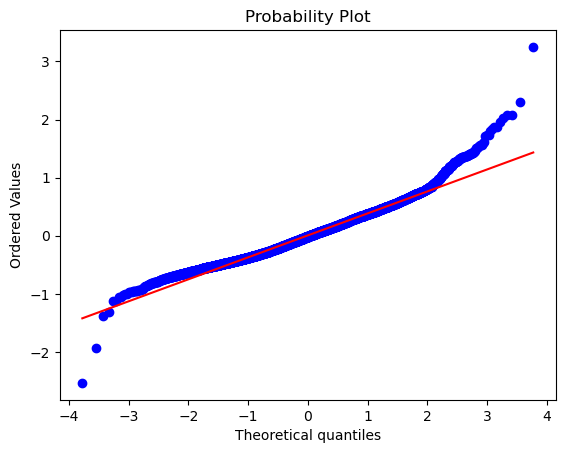

In [44]:
stats.probplot(resids, plot=sns.mpl.pyplot)


## Linear Regression Model #2
### Look just at the relationship between square footage of living space and price

- X = baseline_df_trimmed['sqft_living']
- y = baseline_df_trimmed['price']

In [ ]:
## Declare features and target variable
X = baseline_df_trimmed.drop('price', axis=1)
y = baseline_df_trimmed['price']

# Split the data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

# Create LR Model
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

In [ ]:
# Baseline Model Results
r2_score = metrics.r2_score(y_test, y_pred)
print("R-squared score:", r2_score)

In [ ]:
# # Split our preprocessed data into our features and target arrays
# y = application_df["IS_SUCCESSFUL"].values
# X = application_df.drop(["IS_SUCCESSFUL"],1).values

# # Split the preprocessed data into a training and testing dataset
# X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

# # Create a StandardScaler instances
# scaler = StandardScaler()

# # Fit the StandardScaler
# X_scaler = scaler.fit(X_train)

# # Scale the data
# X_train_scaled = X_scaler.transform(X_train)
# X_test_scaled = X_scaler.transform(X_test)

In [46]:
baseline_500k_to_15mil.to_csv("../data/baseline_500k_to_15mil.csv",index=False)

In [45]:
!pwd

/Users/jamesbenasuli/Desktop/flatiron/projects/Housing-Sales-Analysis/notebooks
